# Differentiation in Simple Cases
For simple problems involing differentiation, try using something like [SymPy](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html#derivatives) for a symbolic approach. Note that this isn't a good approach to e.g. computing gradients (for that, use [Torch](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html) or [JAX](https://jax.readthedocs.io/en/latest/notebooks/autodiff_cookbook.html)

# Taylor Expansion
Actually a MacLaurin expansion, since the function is about 0.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from scipy.special import factorial

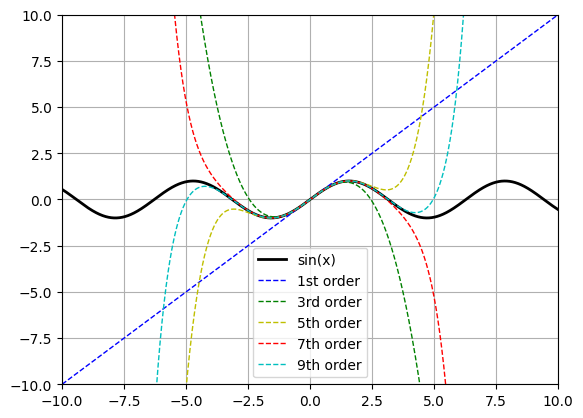

In [2]:
# Define the function to approximate
x = np.linspace(-10, 10, 2000)
y = np.sin(x)

# Set up plot
plt.plot(x, y, 'k', linewidth = 2)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(True)

# First order Taylor expansion
P = [1, 0] # x + 0
yT1 = np.polyval(P, x)
plt.plot(x, yT1, 'b--', linewidth = 1)

# Third order Taylor expansion
P = [-1/factorial(3), 0, 1, 0] # -(1/3!)x^3 + x + 0
yT3 = np.polyval(P, x)
plt.plot(x, yT3, 'g--', linewidth = 1)

# Fifth order Taylor expansion
P = [1/factorial(5), 0, -1/factorial(3), 0, 1, 0] #(1/5!)x^5 + 0 -(1/3!)x^3 + x + 0
yT5 = np.polyval(P, x)
plt.plot(x, yT5, 'y--', linewidth = 1)

# Seventh order Taylor expansion
P = [-1/factorial(7), 0, 1/factorial(5), 0, -1/factorial(3), 0, 1, 0] #(-1/7!)x^7 + 0 + (1/5!)x^5 + 0 - (1/3!)x^3 + x + 0
yT7 = np.polyval(P, x)
plt.plot(x, yT7, 'r--', linewidth = 1)

# Ninth order Taylor expansion
P = [1/factorial(9), 0, -1/factorial(7), 0, 1/factorial(5), 0, -1/factorial(3), 0, 1, 0] #(1/9!)x^9 + 0 - (1/7!)x^7 + 0 + (1/5!)x^5 + 0 - (1/3!)x^3 + x + 0
yT9 = np.polyval(P, x)
plt.plot(x, yT9, 'c--', linewidth = 1)

     
plt.legend(['sin(x)', '1st order', '3rd order', '5th order', '7th order', '9th order'])
plt.show()

# Modeling Exponential Decay

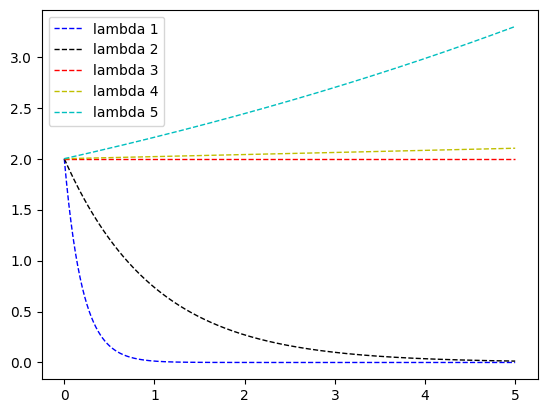

In [3]:
ROCs = [-5, -1, 0, 0.01, 0.1]
time = np.linspace(0, 5, 1000)
colors = ['b--', 'k--', 'r--', 'y--', 'c--', 'g--']
initial_value = 2

def model(ROC, time, initial_value):
    return np.exp(ROC*time) * initial_value
for i, value in enumerate(ROCs):
    values = model(ROCs[i], time, initial_value)
    plt.plot(time, values, colors[i], linewidth = 1)
plt.legend(['lambda 1', 'lambda 2', 'lambda 3', 'lambda 4', 'lambda 5'])
plt.show()

# Example 2nd Order ODE
d2x/dt(x) + 3*d/dt + 2x = 0

=> 0 = c1e^(lambda1 * t) + c2e^(lambda2 * t)

=> @ t = 0, c1 & c2 = 1

In [4]:
A = np.array([[0, 1], [-2, -3]])
np.linalg.eig(A)

(array([-1., -2.]),
 array([[ 0.70710678, -0.4472136 ],
        [-0.70710678,  0.89442719]]))

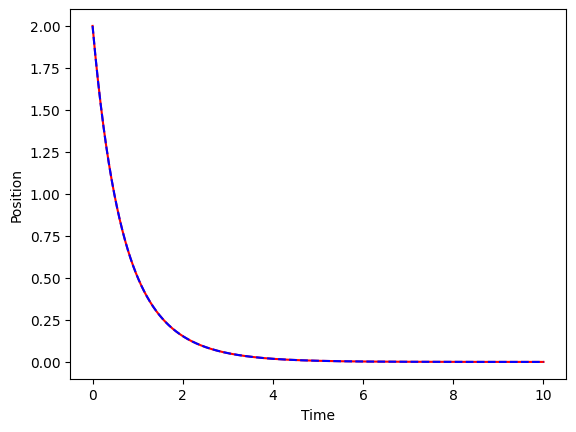

In [5]:
y0 = [2, -3]
t = np.linspace(0, 10, 1000)

analytic_sol = np.exp(-t) + np.exp(-2 * t)
plt.plot(t, analytic_sol, 'r')
plt.xlabel('Time')
plt.ylabel('Position')

linear_ODE = solve_ivp(lambda t, linear_ODE: A @ linear_ODE, (0, 10), y0, t_eval = t)
linear_ODE_sol = linear_ODE.y

plt.plot(t, linear_ODE_sol[0, :], 'b--')


# Solving Systems of Equations with Eigenvalues and Eigenvectors
Say one wants to solve a coupled differental equation...how would you do that? Recall that the simplest notation here is x dot = A (matrix of coefficients) times x

The simplest approach is to transform the A matrix into a diagonal matrix, which we do using the eigenvalues and eigenvectors of A. This allows us to compute: xdot = D (diagonal matrix) times x.

Further deriving this gives us the ability to solve for the state of the system at point t in time:

x(t) = (e^Dt)*x(0)

Some further exposition of this:

AT = TD

D = (T^-1)AT

A = TDT^-1

In [6]:
import numpy as np

In [7]:
A = np.array([[0, 1],[-2, -3]])

In [8]:
vals, vecs = np.linalg.eig(A)
print(f'Eigenvalues of A: {vals}') # Eigenvalues are the roots of the characteristic equation
print(f'Eigenvectors of A: {vecs}') 

Eigenvalues of A: [-1. -2.]
Eigenvectors of A: [[ 0.70710678 -0.4472136 ]
 [-0.70710678  0.89442719]]


In [9]:
# Compute the diagonal matrix

D = np.linalg.inv(vecs) @ A @ vecs # REMEMBER, in Python the '*' operator does element-wise multiplication whereas the '@' operator performs matrix multiplication.
D

array([[-1.,  0.],
       [ 0., -2.]])

In [10]:
# Re-create A using eigs
np.rint(vecs @ D @ np.linalg.inv(vecs))

array([[ 0.,  1.],
       [-2., -3.]])

In [11]:
A = np.array([[0, 2], [-2,0]])

In [12]:
vals, vecs = np.linalg.eig(A)
print(vals)
print(vecs)

[0.+2.j 0.-2.j]
[[0.        -0.70710678j 0.        +0.70710678j]
 [0.70710678+0.j         0.70710678-0.j        ]]


In [13]:
D = np.linalg.inv(vecs) @ A @ vecs
D

array([[0.+2.00000000e+00j, 0.+3.58760778e-16j],
       [0.-3.58760778e-16j, 0.-2.00000000e+00j]])

In [14]:
import scipy

In [15]:
scipy.linalg.expm(D)

array([[-0.41614684+9.09297427e-01j,  0.        +1.63110126e-16j],
       [ 0.        -1.63110126e-16j, -0.41614684-9.09297427e-01j]])

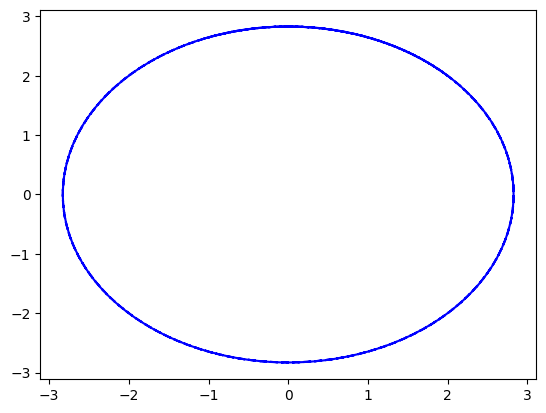

In [16]:
t = np.linspace(0, 10, 1000)
y0 = [2, 2]
#for i in t:
#    sol.append((vecs @ np.e(D * t[i]) @ np.linalg.inv(vecs)) * y0)
linear_ODE = solve_ivp(lambda t, linear_ODE: A @ linear_ODE, (0, 10), y0, t_eval = t)
linear_ODE_sol = linear_ODE.y
plt.plot(linear_ODE_sol[1, :], linear_ODE_sol[0, :], 'b--')
#plt.plot(t, linear_ODE_sol[0, :], 'b--')


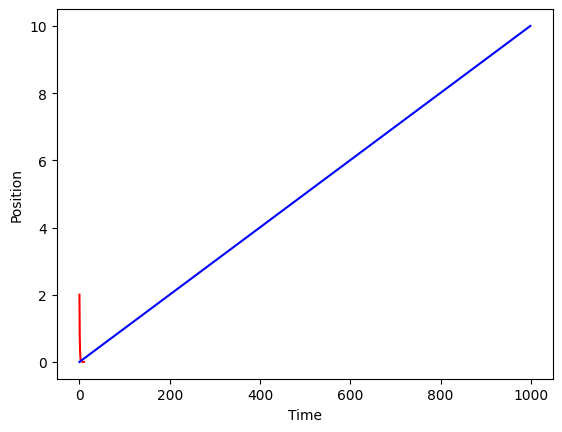

In [17]:
y0 = [2, 2]

plt.plot(t, analytic_sol, 'r')
plt.xlabel('Time')
plt.ylabel('Position')

plt.plot(t, 'b')

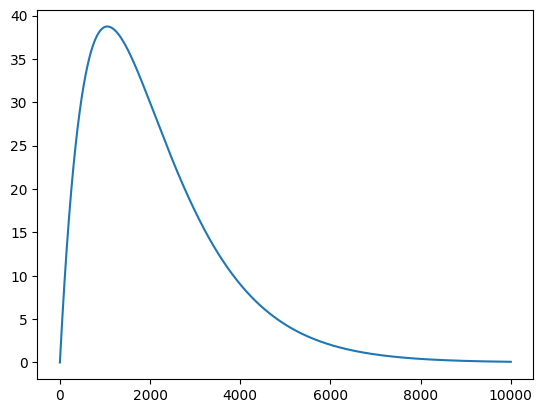

In [18]:
# Visualizing Non-Normal System

A = np.array([[-0.009, 1], [0,-0.01]])
t = np.linspace(0, 1000, 10000)
y0 = [0, 1]

def linear_ode(t, y):
    return A @ y

linear_ODE = solve_ivp(linear_ode, (0, 1000), y0, t_eval = t)
linear_ODE_sol = linear_ODE.y.T
plt.plot(linear_ODE.y[0].T)


# Numerical Integration
Comparing forwards, backwards, and central difference approximations

In [19]:
# Method One - libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import StateSpace, impulse, lsim

In [28]:
# Method One - define the dynamical matrices
A = np.array([[0, 1], [-1, -0.1]]) # added small damping (-0.1 omega)
B = np.array([[0], [1]])
C = np.eye(2)
D = np.array([[1000], [0]])

In [29]:
# Method One - create a state space model
sys = StateSpace(A, B, C, D)

ValueError: x and y can be no greater than 2D, but have shapes (399,) and (399, 2, 1)

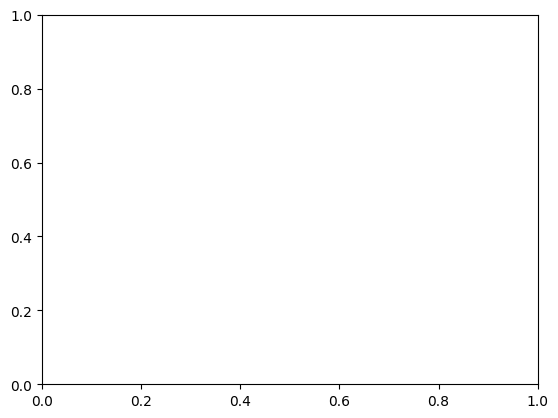

In [31]:
# Method One - send an impulse to the system
t_impulse, y_impulse = impulse(sys, 100)
plt.plot(t_impulse, y_impulse)
plt.grid(True)
plt.show()

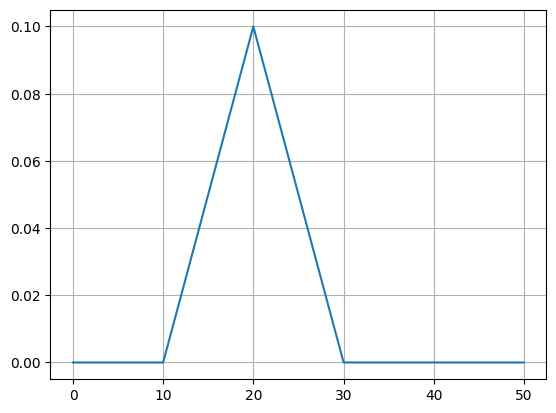

In [23]:
# Method One - create a custom control input
t = np.linspace(0, 50, 5000)
u = 0 * t
u[1000:2000 = np.arange(1, 1001) / 10000
u[2000:3000] = (1000 - np.arange(1, 1001)) / 10000
plt.plot(t, u)
plt.grid(True)
plt.show()

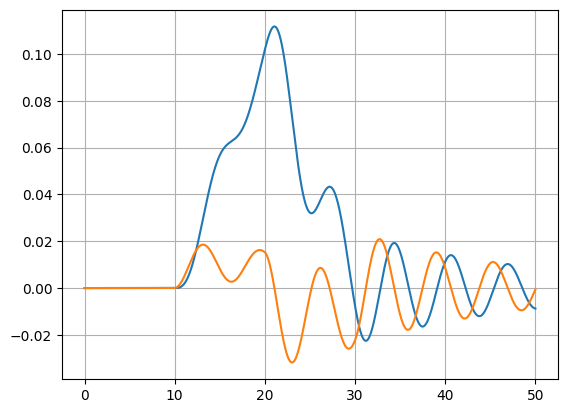

In [24]:
# Method One - perturb the system with the custom input
t_lsim, y_lsim, _ = lsim(sys, u, t)
plt.plot(t_lsim, y_lsim)
plt.grid(True)
plt.show()

In [25]:
# Method Two - import libraries & set up plots
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from control.matlab import *
#import slycot
from scipy import signal

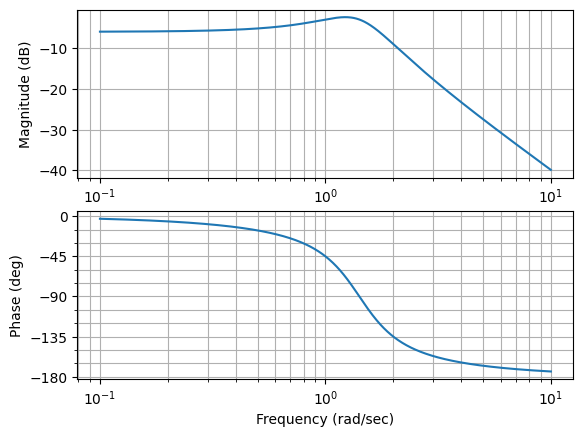

In [26]:
s = tf(np.array([1, 0]), np.array([0, 1]))
G = 1 / (s**2 + s + 2)
w, mag, phase = bode(G)

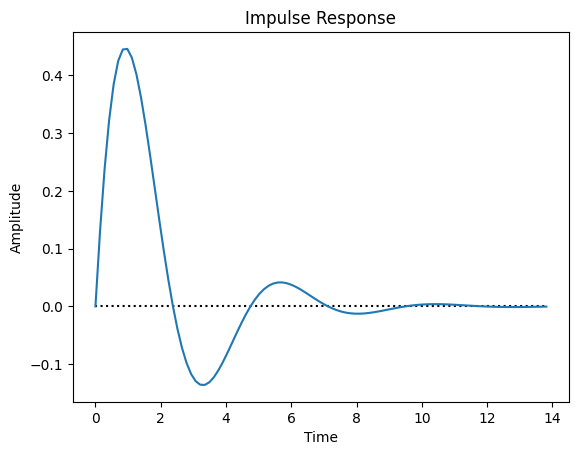

In [27]:
A = np.array([[0, 1], [-2, -1]])
B = np.array([0,1]).reshape((2, 1))
C = np.array([1, 0])
D = 0
G = ss2tf(A, B, C, D)

ia, it = impulse(G)

plt.plot(it[[0, -1]],np.array([0, 0]), 'k:')
plt.plot(it, ia)
plt.title('Impulse Response')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.show()

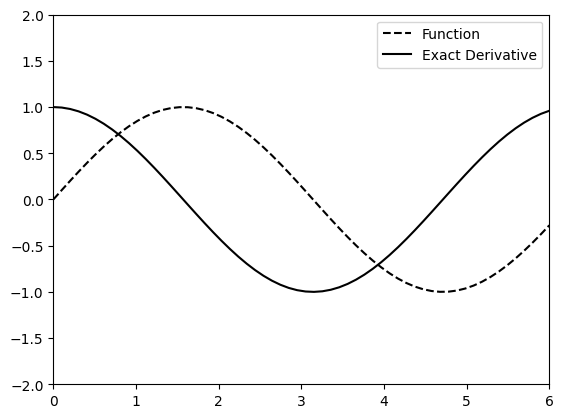

In [8]:
import numpy as np
from matplotlib import pyplot as plt

t = np.linspace(0, 6, 60)
f = np.sin(t)
dt = 0.2
exact_derivative = np.cos(t)

plt.plot(t, f, 'k--')
plt.plot(t, exact_derivative, 'k')
plt.legend(['Function', 'Exact Derivative'])
plt.xlim(0, 6)
plt.ylim(-2, 2)
plt.show()

In [12]:
# Forward Difference
FD = (np.sin(t + dt) - np.sin(t)) / dt

# Backwards Difference
BD = (np.sin(t) - np.sin(t - dt)) / dt

# Central Difference
CD = (np.sin(t + dt) - np.sin(t - dt)) / (2 * dt)

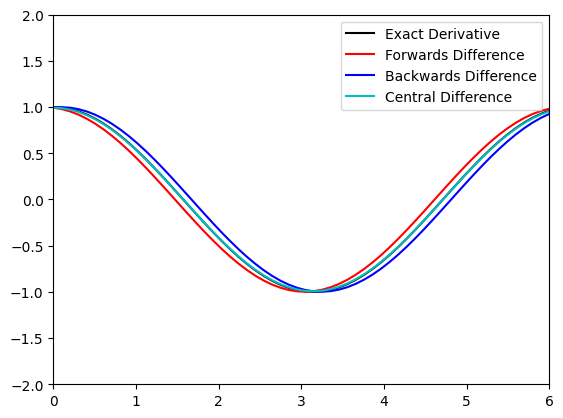

In [13]:
plt.plot(t, exact_derivative, 'k')
plt.plot(t, FD, 'r')
plt.plot(t, BD, 'b')
plt.plot(t, CD, 'c')
plt.legend(['Exact Derivative', 'Forwards Difference', 'Backwards Difference', 'Central Difference'])
plt.xlim(0, 6)
plt.ylim(-2, 2)
plt.show()

## Calculating Derivatives with Arbitrary Data
Sometimes there is no known function, so one needs to use a combination of forwards, backwards, and central difference methods to calculate the derivative.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

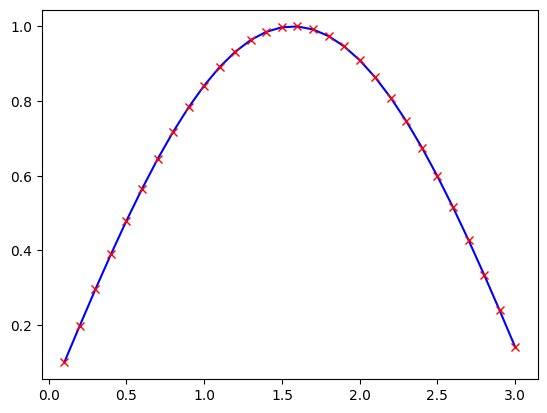

In [12]:
n = 30
x = np.linspace(0.1, 3, n)
f = np.sin(x)

plt.plot(x, f, 'b')
plt.plot(x, f, 'rx')
plt.show()

In [13]:
dx = x[1] - x[0]

dfdx = np.zeros(n)

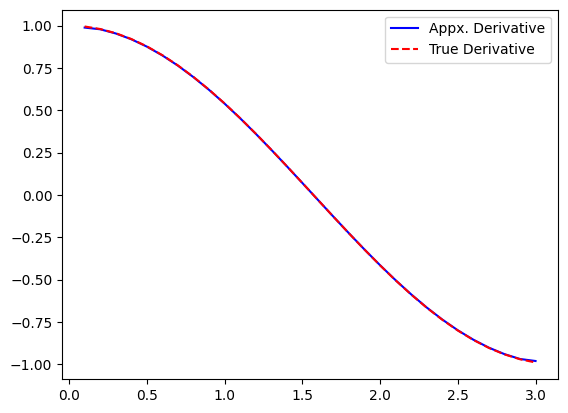

In [15]:
dfdx[0] = (f[1] - f[0]) / (x[1] - x[0]) # Use forward method for 1st datapoint

for i in range (1, n-1):
    dfdx[i] = (f[i+1] - f[i-1]) / (x[i+1] - x[i-1]) # Use central method for middle datapoints

dfdx[-1] = (f[-1] - f[-2]) / (x[-1] - x[-2]) # Use backwards method for last datapoint

plt.figure
plt.plot(x, dfdx, 'b', label = 'Appx. Derivative')
plt.plot(x, np.cos(x), 'r--', label = 'True Derivative')
plt.legend()
plt.show()

# Numerical Integration with the Rectangle and Trapezpoidal Rules

In this example I'll integrate the function sin(x) from 0 to 10, with variables ending in "f" denoting "fine", as in small delta x, and variables ending in "c" denoting "coarse"

In [1]:
import numpy as np
from matplotlib import pyplot as plt

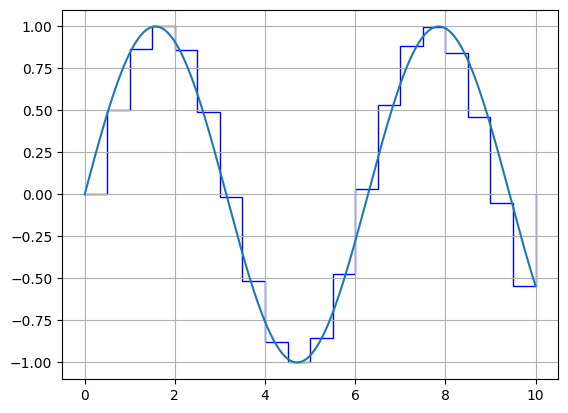

In [4]:
# Define physical constants and time base
a = 0
b = 10
dxf = 0.01
xf = np.linspace(a, b, int(b/dxf))
yf = np.sin(xf)

plt.figure()
plt.grid(True)
plt.plot(xf, yf)

dxc = 0.5
xc = np.linspace(a, b, int(b/dxc))
yc = np.sin(xc)

edges = np.linspace(a, b, int(b/dxc) + 1, endpoint = True)
plt.stairs(yc, edges, color = 'b')
plt.grid(True)
plt.show()

In [6]:
n = len(xc)

# Left Rectangle Rule
area1 = 0
for i in range(n-1):
    area1 = area1 + yc[i] * dxc
print (area1)

1.842605279599356


In [7]:
# Right Rectangle Rule
area2 = 0
for i in range(n-1):
    area2 = area2 + yc[i+1] * dxc
print(area2)

1.5705947241546712


In [9]:
# Trapezoid Rule
area3 = 0
for i in range(n-1):
    area3 = area3 + (dxc/2) * (yc[i] + yc[i+1])
print(area3)

1.7066000018770136


In [10]:
# Using Built-In Functions
area1 = sum(yc[:-1]) * dxc
area2 = sum(yc[1:]) * dxc
area3 = np.trapz(yc, xc)
print(area1, area2, area3)

1.842605279599356 1.5705947241546712 1.7964210546073829


In [12]:
area3 = np.trapz(yc) * dxc
print(area3)

1.706600001877014


In [14]:
# Better Estimate Using Fine-Resolution Data
area1f = sum(yf[:-1]) * dxf
area2f = sum(yf[1:]) * dxf
area3f = np.trapz(yf) * dxf
print(area1f, area2f, area3f)

1.839937222139193 1.8344970110302992 1.837217116584743


# Numerical Integration of ODEs - Forward & Backward Euler
Numerically integrating 2d system of diff eq, the Spring - Mass - Damper System!

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [16]:
# Set parameters of spring-mass system
w = 2 * np.pi # Natural frequency
d = 0.1 # Damping ratio

A = np.array([[0, 1], [-w**2, -2 * d * w]])

dt = 0.01 # Time step
T = 10 # Length of time to integrate
num_time_slices = int(T / dt)
time_slices = np.linspace(0, T, num_time_slices)

x0 = [2, 0] # Initial conditions, where x = 2 and v = 0

inv_term = np.linalg.pinv(np.eye(2) - A * dt) # Pre-computing inverse for efficiency

In [17]:
# Define and run integrators

# Forward Euler
xF = np.zeros((2, num_time_slices))
xF[:, 0] = x0
for i in range(num_time_slices - 1):
    xF[:, i + 1] = (np.eye(2) + dt * A) @ xF[:, i]

# Backward Euler
xB = np.zeros((2, num_time_slices))
xB[:, 0] = x0
for i in range(num_time_slices - 1):
    xB[:, i + 1] = inv_term @ xB[:, i]

# 4th-order Rungne-Cutta for ground truth
def ode_func(t, x):
    return A @ x
ivp_sol = solve_ivp(ode_func, (0, T), x0, t_eval = time_slices)
xRK4 = ivp_sol.y

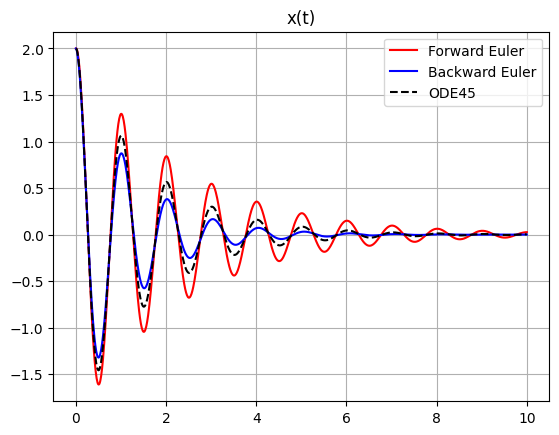

In [18]:
plt.plot(time_slices, xF[0, :], 'r')
plt.plot(time_slices, xB[0, :], 'b')
plt.plot(time_slices, xRK4[0, :], 'k--')
plt.grid(True)
plt.title('x(t)')
plt.legend(['Forward Euler', 'Backward Euler', 'ODE45'])
plt.show()

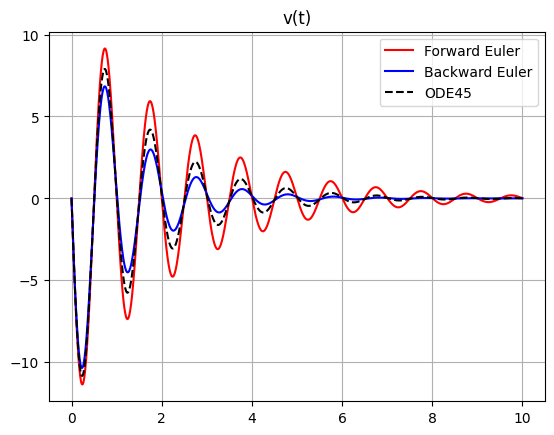

In [19]:
plt.plot(time_slices, xF[1, :], 'r')
plt.plot(time_slices, xB[1, :], 'b')
plt.plot(time_slices, xRK4[1, :], 'k--')
plt.grid(True)
plt.title('v(t)')
plt.legend(['Forward Euler', 'Backward Euler', 'ODE45'])
plt.show()

# Coding a 4th Order Rugne-Kutta Integrator from scratch

In the following cells I'll be coding up a 4th order RK integrator and using it to integrate the Lorenz (1963) model.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Define constants

sigma = 10
beta = 8/3
rho = 28

In [3]:
# Create function that performs a single step of RK4 integration

def rk4(f, dt, tk, xk):
    
    f1 = f(tk, xk)
    f2 = f((tk + (dt/2)), (xk + (dt/2) * f1))
    f3 = f((tk + dt / 2), (xk + (dt/2) * f2))
    f4 = f((tk + dt), (xk + dt*f3))

    x_new = xk + (dt/6) * (f1 + (2 * f2) + (2 * f3) + f4)
    
    return x_new

In [6]:
# Create Lorenz function passing in x, which is a 3-D state vector

def lorenz(t, x):
    dx = [sigma * (x[1] - x[0]),
          x[0] * (rho - x[2]) - x[1],
          (x[0] * x[1]) - (beta * x[2])]
          
    return np.array(dx)

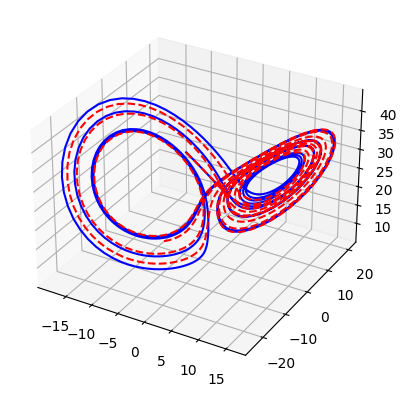

In [7]:
# Initial conditions

x0 = [-8, 8, 27]

# Compute trajectory

dt = 0.01
T = 10

num_time_points = int(T/dt)
t = np.linspace(0, T, num_time_points)

X = np.zeros((3, num_time_points))

X[:, 0] = x0
xin = x0

for i in range(num_time_points - 1):
    xout = rk4(lorenz, dt, t[i], xin)
    X[:, i + 1] = xout
    xin = xout

ax = plt.figure().add_subplot(projection = '3d')
ax.plot(X[0, :], X[1, :], X[2, :], 'b')
lorenz_sol = solve_ivp(lorenz, (0, T), x0, t_eval = t)
t = lorenz_sol.t
y = lorenz_sol.y.T
ax.plot(y[:, 0], y[:, 1], y[:, 2], 'r--')
plt.show()